In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data = pd.read_csv('Emails.csv')
data


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data.dropna(inplace=True)
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:

data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


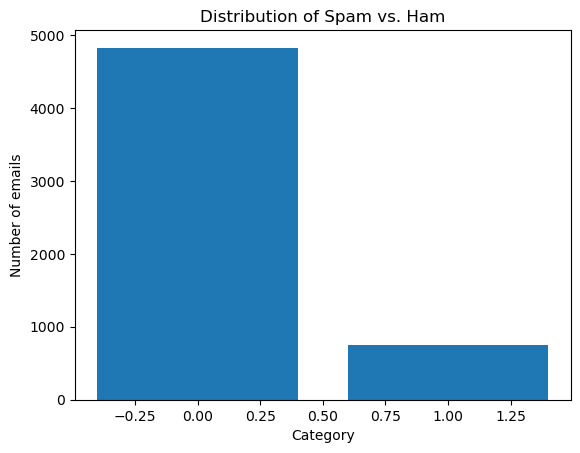

In [8]:
spam_counts = data['Category'].value_counts()
plt.bar(spam_counts.index, spam_counts.values)
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Category')
plt.ylabel('Number of emails')
plt.show()

In [9]:

X = data['Message']  # Assuming 'Message' is the column with your text data
y = data['Category']  # Assuming 'Category' is the column with your labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Train the SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [11]:


X_test_vec = vectorizer.transform(X_test)
y_pred = classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
svm_accuracy = accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.990578734858681


In [12]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
rf_y_pred = rf_classifier.predict(X_test_vec)

# Evaluate the classifier's accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9811574697173621


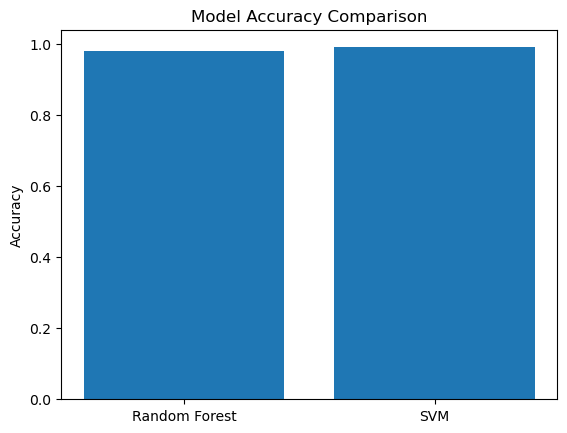

In [13]:
models = ['Random Forest', 'SVM']
accuracies = [rf_accuracy, svm_accuracy]

plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

In [14]:


results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('test_results.csv', index=False)